# Basic Visualizations

In [16]:
# Imports
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()
import seaborn as sns
import helper
import matplotlib.pyplot as plt;
# To allow for inline rendering of plots.
%matplotlib inline

In [17]:
data, titles, movies_data, genres = helper.load_data('data/data.txt', 'data/movies.txt')

In [18]:
# Array stores total of user ratings and number of ratings
movie_ratings = np.zeros((len(movies_data), 2))

In [19]:
# Loop through data set
for d in data:
    # Add user's rating for corresponding movie
    movie_ratings[int(d[1] - 1)][0] += d[2]
    # Count of ratings per movie
    movie_ratings[int(d[1] - 1)][1] += 1

# All ratings of all movies
all_ratings = data[:,2]

## Visualizing Ratings for Top 10 Popular Movies and Top 10 Best Movies

In [20]:
'''
Given an input array of movie ratings and scalar n_max, return the indices in 
lst of the n_max highest values in the list.

Input:
    - lst: list of values to sort and select from
    - n_max: desired n number of movies with certain attribute

Output:
    - max_positions: indices of n_max movies with most number of ratings

'''
# def n_max_pos(movie_ratings, n_max):
#     sorted_pos = np.argsort(rating_per_mov)
#     max_positions = sorted_pos[-1*n_max:]
#     return max_positions

def n_max_pos(lst, n_max):
    sorted_pos = np.argsort(lst)
    max_positions = sorted_pos[-1*n_max:]
    return max_positions

In [21]:
# Calculate average rating score for each movie
avgs = np.zeros(len(movies_data))
for i, m in enumerate(movie_ratings):
    # all_ratings[i] = m[1]
    if m[1] != 0:
        avgs[i] = m[0] / m[1]
        
# Finding top 10 movies with the most ratings
rating_per_mov = movie_ratings[:,1]
most_ratings_pos = n_max_pos(rating_per_mov, 10)

# Find average ratings of the 10 movies with most number of ratings
most_ratings = avgs[most_ratings_pos]

# Finding top 10 movies with highest average ratings
best_movies_pos = n_max_pos(avgs, 10)
best_avg = avgs[best_movies_pos]

In [22]:
# Find the review counts of the top 10 most popular movies
most_ratings_counts = []
best_movies_counts = []
for d in data:
    if d[1] - 1 in most_ratings_pos:
        most_ratings_counts.append(d[2])
    if d[1] - 1 in best_movies_pos:
        best_movies_counts.append(d[2])

Text(0,0.5,'Counts of Movies')

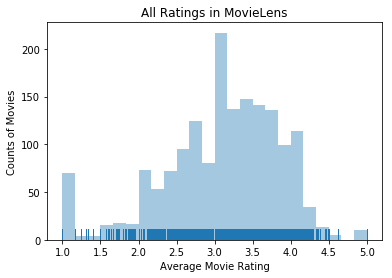

In [23]:
all_hist_avgs = sns.distplot(avgs, kde=False, rug=True)
all_hist_avgs.axes.set_title("All Ratings in MovieLens")
all_hist_avgs.set_xlabel("Average Movie Rating")
all_hist_avgs.set_ylabel("Counts of Movies")

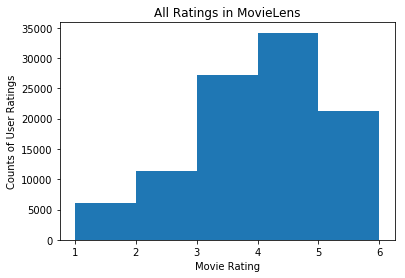

In [24]:
plt.hist(all_ratings, bins=5, range=(1,6))
plt.title("All Ratings in MovieLens")
plt.xlabel("Movie Rating")
plt.ylabel("Counts of User Ratings")
plt.savefig('images/basic_vis_allratings.png', dpi=300)

Text(0,0.5,'Counts of Movies')

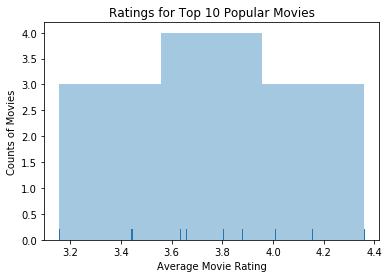

In [25]:
most_hist = sns.distplot(most_ratings, kde=False, rug=True)
most_hist.axes.set_title("Ratings for Top 10 Popular Movies")
most_hist.set_xlabel("Average Movie Rating")
most_hist.set_ylabel("Counts of Movies")

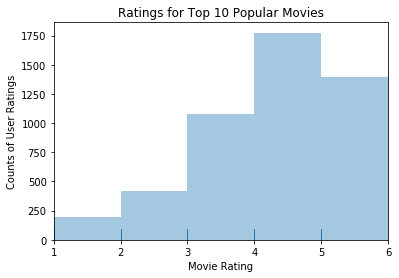

In [51]:
most_hist_all = sns.distplot(most_ratings_counts, kde=False, rug=True, bins=5, hist_kws={'range':(1,6)})
most_hist_all.axes.set_title("Ratings for Top 10 Popular Movies")
most_hist_all.set_xlabel("Movie Rating")
most_hist_all.set_ylabel("Counts of User Ratings")
most_hist_all.set(xlim=(1, 6))
fig = most_hist_all.get_figure()
fig.savefig('images/basic_vis_10mostpopular.png', dpi=300)

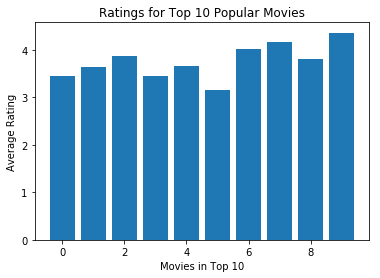

In [12]:
# Bar Graph for Top 10 Popular Movies
plt.bar(np.arange(10), most_ratings)
plt.xlabel('Movies in Top 10')
plt.ylabel('Average Rating')
plt.title('Ratings for Top 10 Popular Movies')

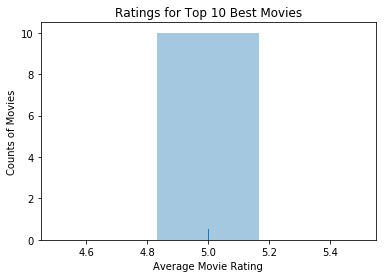

In [13]:
best_hist = sns.distplot(best_avg, kde=False, rug=True)
best_hist.axes.set_title("Ratings for Top 10 Best Movies")
best_hist.set_xlabel("Average Movie Rating")
best_hist.set_ylabel("Counts of Movies")

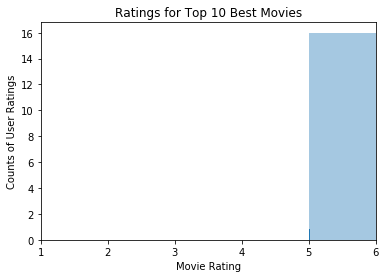

In [52]:
best_hist_all = sns.distplot(best_movies_counts, kde=False, rug=True, bins=5, hist_kws={'range':(1,6)})
best_hist_all.axes.set_title("Ratings for Top 10 Best Movies")
best_hist_all.set_xlabel("Movie Rating")
best_hist_all.set_ylabel("Counts of User Ratings")
best_hist_all.set(xlim=(1, 6))
fig = best_hist_all.get_figure()
fig.savefig('images/basic_vis_10best.png', dpi=300)

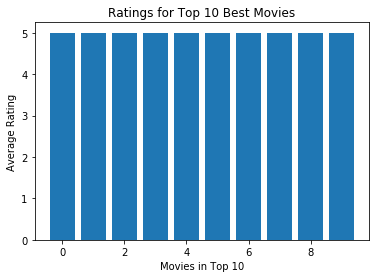

In [15]:
# Bar Graph for Top 10 Best Movies
plt.bar(np.arange(10), best_avg)
plt.xlabel('Movies in Top 10')
plt.ylabel('Average Rating')
plt.title('Ratings for Top 10 Best Movies')
plt.show()

In [16]:
# I don't know what these histograms are...@pamela pls explain??
# all_ratings_hist = plt.hist(all_ratings, bins = 5)
# plt.title('All Ratings in MovieLens Histogram')
# plt.xlabel('Rating')
# plt.ylabel('Number of Ratings')

In [17]:
# sns.distplot(best_avg)
# plt.title("All Ratings of 10 Most Popular Movies")
# plt.xlabel("Rating")
# plt.ylabel("Proportional Number of Ratings")

In [18]:
# sns.distplot(best_avg)
# plt.title("All Ratings of 10 Best Movies")
# plt.xlabel("Rating")
# plt.ylabel("Proportional Number of Ratings")

## Visualizations for Three Specific Genres

In [38]:
def get_genre_counts(genre1_ind, genre2_ind, genre3_ind, data, movies_data):
    '''
    genre1_ind: integer index representing column number for first genre
    genre2_ind: integer index representing column number for second genre
    genre2_ind: integer index representing column number for third genre
    data: data set of all ratings
    movies_data: array representing genres for each movie
    
    Returns the counts as numpy ndarrays to make a histogram for each genre
    '''
    genre1_counts = []
    genre2_counts = []
    genre3_counts = []
    for d in data:
        if movies_data[int(d[1]-1)][genre1_ind] == 1:
            genre1_counts.append(d[2])
        if movies_data[int(d[1]-1)][genre2_ind] == 1:
            genre2_counts.append(d[2])
        if movies_data[int(d[1]-1)][genre3_ind] == 1:
            genre3_counts.append(d[2])
            
    return np.array(genre1_counts), np.array(genre2_counts), np.array(genre3_counts)

In [39]:
genre1_ind = 18
genre2_ind = 3
genre3_ind = 10

genre1_counts, genre2_counts, genre3_counts = get_genre_counts(genre1_ind, genre2_ind, genre3_ind, data, movies_data)

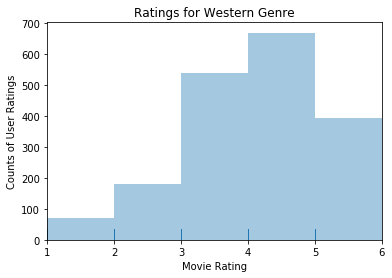

In [53]:
genre1_hist = sns.distplot(genre1_counts, kde=False, rug=True, bins=5, hist_kws={'range':(1,6)})
title = "Ratings for " + genres[genre1_ind] + " Genre" 
genre1_hist.axes.set_title(title)
genre1_hist.set_xlabel("Movie Rating")
genre1_hist.set_ylabel("Counts of User Ratings")
genre1_hist.set(xlim=(1, 6))
fig = genre1_hist.get_figure()
fig.savefig('images/basic_vis_western.png', dpi=300)

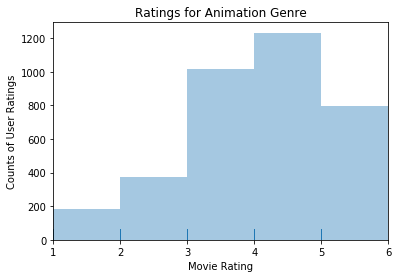

In [56]:
genre2_hist = sns.distplot(genre2_counts, kde=False, rug=True, bins=5, hist_kws={'range':(1,6)})
title = "Ratings for " + genres[genre2_ind] + " Genre" 
genre2_hist.axes.set_title(title)
genre2_hist.set_xlabel("Movie Rating")
genre2_hist.set_ylabel("Counts of User Ratings")
genre2_hist.set(xlim=(1, 6))
fig = genre2_hist.get_figure()
fig.savefig('images/basic_vis_animation.png', dpi=300)

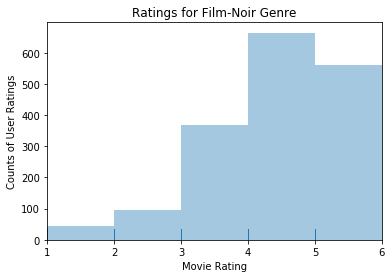

In [58]:
genre3_hist = sns.distplot(genre3_counts, kde=False, rug=True, bins=5, hist_kws={'range':(1,6)})
title = "Ratings for " + genres[genre3_ind] + " Genre" 
genre3_hist.axes.set_title(title)
genre3_hist.set_xlabel("Movie Rating")
genre3_hist.set_ylabel("Counts of User Ratings")
genre3_hist.set(xlim=(1, 6))
fig = genre3_hist.get_figure()
fig.savefig('images/basic_vis_filmnoir.png', dpi=300)